In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [15]:
data = pd.read_csv('diabetes2.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
data['Outcome'].unique()

array([1, 0], dtype=int64)

In [17]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [21]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[0.        , 0.80904523, 0.43859649, ..., 0.32637854, 0.07514944,
        0.73333333],
       [0.05882353, 0.44723618, 0.21052632, ..., 0.414307  , 0.20538002,
        0.        ],
       [0.35294118, 0.81407035, 0.54385965, ..., 0.36214605, 0.04269855,
        0.48333333],
       ...,
       [0.        , 0.4321608 , 0.59649123, ..., 0.53353204, 0.06831768,
        0.06666667],
       [0.05882353, 0.50251256, 0.57894737, ..., 0.47690015, 0.15627669,
        0.35      ],
       [0.58823529, 0.55778894, 0.61403509, ..., 0.40983607, 0.02690009,
        0.31666667]])

In [22]:
model = DecisionTreeClassifier(max_depth=5)

In [23]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7597402597402597

In [24]:
y_pred = model.predict(x_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 18],
       [19, 36]], dtype=int64)

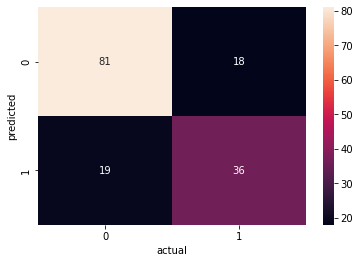

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()